# Prediction of heart disease

## Problem statement
Predict if a aptient have heart disease based on his/her clinical parameters.

## DATA
The dataset can be found here: https://www.kaggle.com/ronitf/heart-disease-uci



## Features
1. age - age in years<br>
2. sex - (1 = male; 0 = female)<br>

3. cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease


4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern

5. chol - serum cholestoral in mg/dl
serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern

6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes

7. restecg - resting electrocardiographic results
- 0: Nothing to note
- 1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
- 2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber

8. thalach - maximum heart rate achieved

9. exang - exercise induced angina (1 = yes; 0 = no)

10. oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more

11. slope - the slope of the peak exercise ST segment
- 0: Upsloping: better heart rate with excercise (uncommon)
- 1: Flatsloping: minimal change (typical healthy heart)
- 2: Downslopins: signs of unhealthy heart

12. ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

13. thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising

14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)
Note: No personal identifiable information (PPI) can be found in the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd '/content/gdrive/My Drive/Colab Notebooks/DS projects'

/content/gdrive/My Drive/Colab Notebooks/DS projects


In [3]:
# IMPORT packages, libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data split
from sklearn.model_selection import train_test_split

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# cross validation
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# Evaluation metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,\
  precision_score, recall_score, f1_score, plot_roc_curve

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load dataset
df=pd.read_csv('heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## EDA

In [ ]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


All the features are of numerical type, so we need not go for any encoding.

In [ ]:
# Stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


We can see here the stats for different features.

Few of them have values ranging in hundreds and others have really low values, so we might need to **scale down our features**.

We can also see that all features have 330 records, i.e. no missing values. But still lets have a look.

In [ ]:
# missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# TARGET
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

This is a nearly balanced dataset.

### Comparing "Sex" feature with TARGET

In [ ]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

So we have more males (1) than females (0) in our data set.

In [ ]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


So, around 75% of females and 47% of males tend to have heart disease.

Lets plot it.

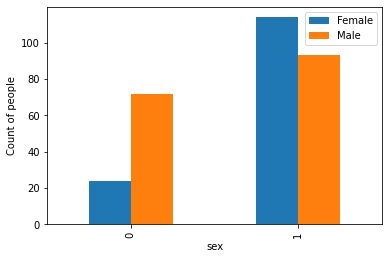

In [ ]:
pd.crosstab(df.sex, df.target).plot(kind='bar');
plt.ylabel('Count of people');
plt.legend(['Female', 'Male']);

### Comparing "cp" feature with TARGET
cp - chest pain type
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


So, as cp goes from 0 to 3, the chances of heart diseases increase. And the highest chance is for people with **Atypical angina** and **Non-anginal pain**.

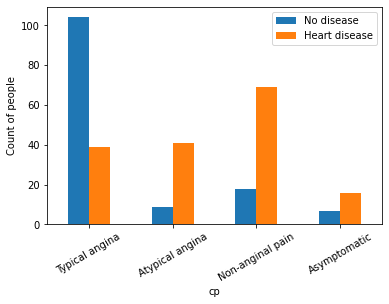

In [ ]:
pd.crosstab(df.cp, df.target).plot(kind='bar')
plt.ylabel('Count of people');
plt.legend(['No disease', 'Heart disease'])
plt.xticks(ticks=[0,1,2,3],rotation=30,labels=['Typical angina', 'Atypical angina','Non-anginal pain','Asymptomatic']);

### Comparing age and cp

In [ ]:
df.age.describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

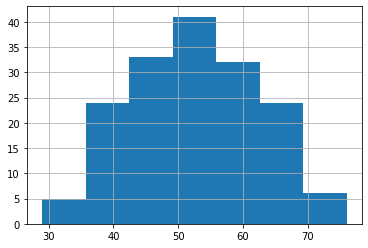

In [ ]:
# AGE distribution among patients with heart disease
df[df.target==1].age.hist(bins=7);

So, people with age 40-65 are more prone to heart disease.

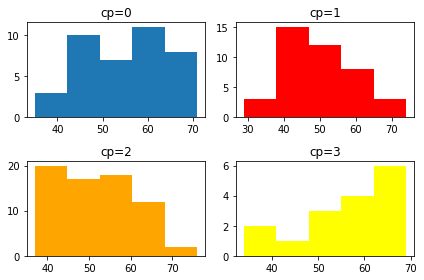

In [ ]:
# Comparing the AGE distribution for different chest pains.
fig, ax= plt.subplots(2,2)
ax[0,0].hist(df[(df.cp==0) & (df.target==1)].age, bins=5);
ax[0,0].set_title('cp=0');
ax[0,1].hist(df[(df.cp==1) & (df.target==1)].age, bins=5, color='red');
ax[0,1].set_title('cp=1');
ax[1,0].hist(df[(df.cp==2) & (df.target==1)].age, bins=5, color='orange');
ax[1,0].set_title('cp=2');
ax[1,1].hist(df[(df.cp==3) & (df.target==1)].age, bins=5, color='yellow');
ax[1,1].set_title('cp=3');
fig.tight_layout()

Here people with age 40-65 are more likely to have chest pain with label 1,2,3 which has higher risk of heart disease.

**Age 40 to 65 risky**.

### Co-relation matrix

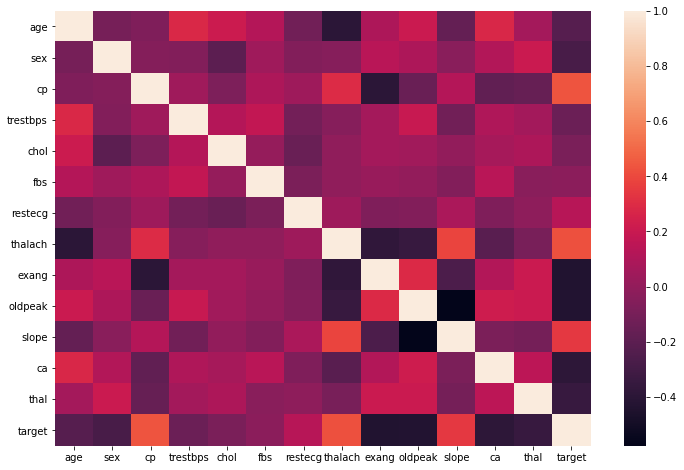

In [ ]:
fig, ax= plt.subplots(figsize=(12,8))
ax=sns.heatmap(df.corr());

**Positive corr (target tends to 1->disease with inc. in these values)**
- cp
- thalach (max heart rate)
- slope (more downslope of peak exercise ST segment increases risk)

**Negative corr (risk reduces with inc. in values)**
- exang (if angina/ chest pain is due to exercise then low risk)
- oldpeak
- ca (more colored vessels seen during fluoroscopy, low risk)

## Feature Engineering 

### Outlier detection
We will now try to find outliers in features with continuous values.

AGE


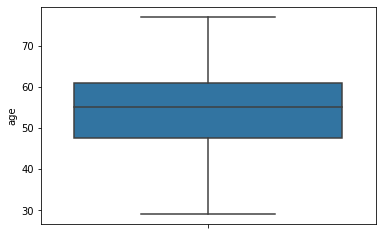

TRESTBPS


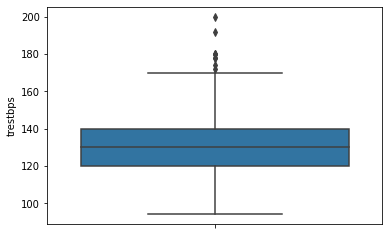

CHOL


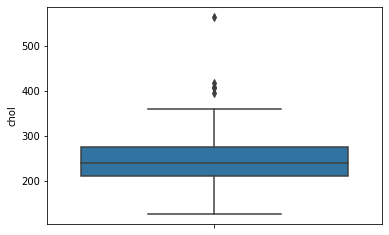

THALACH


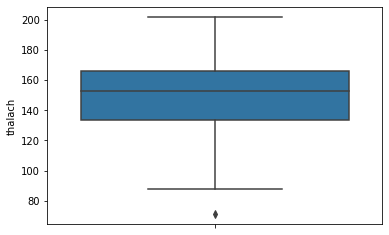

In [ ]:
for x in ['age','trestbps','chol','thalach']:
  print(x.upper())
  sns.boxplot(data=df, y=x);
  plt.show()

We can see these features have outliers.

### Checking distribution

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

AGE


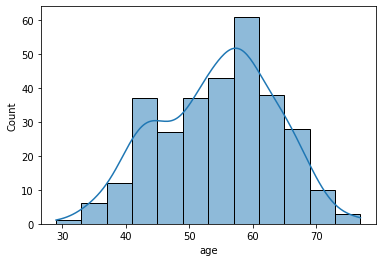

skew: -0.2024633654856539
--------------------------------------
TRESTBPS


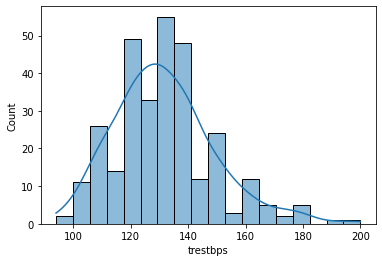

skew: 0.7137684379181465
--------------------------------------
CHOL


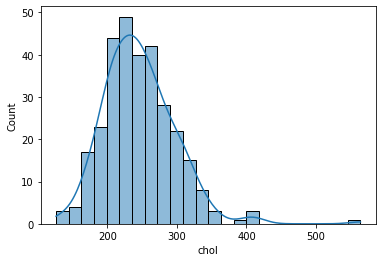

skew: 1.1434008206693387
--------------------------------------
THALACH


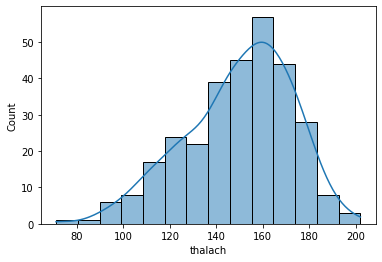

skew: -0.5374096526832253
--------------------------------------


In [ ]:
for x in ['age','trestbps','chol','thalach']:
  print(x.upper())
  sns.histplot(df[x], kde=True);
  plt.show()
  print('skew:', df[x].skew())
  print('--------------------------------------')

As 'trestbps' and 'chol' feature have skewness more than 0.5 (+ or -), we need to transform these.

And then we will scale down the features.

## Feature transformation / Normalization

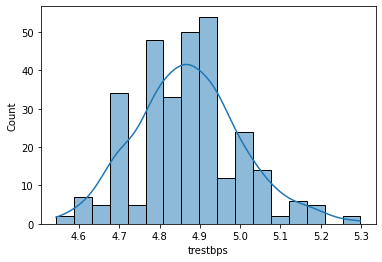

In [ ]:
sns.histplot(np.log(df.trestbps), kde=True)

In [6]:
np.log(df.trestbps).skew()

0.2817574464672539

In [7]:
np.log(df.chol).skew()

0.08666713455435988

We can see that using log transform we are able to reduce the **skewness** (left or right shift of distribution) and normalize the distribution.

## Methods for feature engineering
Here we will make a function to apply outlier treatment, normalization and scaling on both train set and test set.

We will learn the features from the train set first into outlier_dict{} and scale_dict{} and use these over test set, rather than learning different features/characters of test set.

We are going for **Outlier handling** before **Normalization** as Outlier handling helps in normalizing the data upto certain extent.

In [ ]:
outlier_dict={}
scale_dict={}
def train_engg(X, feat=['age','trestbps','chol','thalach']):
  for f in feat:
    # print(f)
    # outlier
    first_quartile= np.percentile(X[f],25)
    third_quartile= np.percentile(X[f],75)
    iqr= third_quartile-first_quartile
    lowest= first_quartile-(1.5*iqr)
    highest= third_quartile+(1.5*iqr)
    # print(lowest, highest)
    outlier_dict[f]=[lowest,highest]
    X[f]= np.where(X[f]>highest, highest, np.where(X[f]<lowest, lowest, X[f]))
    
    # transformation/normalization
    X[f]=np.log(X[f])

    # scaling
    mean=X[f].mean()
    std=X[f].std()
    scale_dict[f]=[mean,std]
    X[f]=(X[f]-mean)/std
  return X


In [ ]:
# Test set method for feature engg
def test_engg(X, feat=['age','trestbps','chol','thalach']):
  for f in feat:

    # outlier
    X[f]= np.where(X[f]>outlier_dict[f][1], outlier_dict[f][1],np.where(X[f]<outlier_dict[f][0], outlier_dict[f][0], X[f]))
    
    # transformation/normalization
    X[f]=np.log(X[f])

    # scaling
    X[f]=(X[f]-scale_dict[f][0])/scale_dict[f][1]
  return X

# X_test=test_engg(X_test)

## Data prep for modelling

In [ ]:
X= df.drop(['target'], axis=1)

y= df.target

In [ ]:
# Splitting the data
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
len(X_test)

61

In [ ]:
len(X_train)

242

## Creating models

In [ ]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "Linear SVC": LinearSVC()}

In [ ]:
# Function to train the models and record the scores
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(42)
    # dict to store model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit/train the model
        
        X_train_new=train_engg(X_train.copy())

        model.fit(X_train_new, y_train)
        print(name, model.get_params())
        
        # Evaluate the model and append its score to model_scores

        X_test_new=test_engg(X_test.copy())

        model_scores[name] = model.score(X_test_new, y_test) # accuracy
    return model_scores

In [ ]:
model_scores= fit_score(models, X_train, X_test, y_train, y_test)
model_scores

KNN {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Logistic Regression {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Random Forest {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Linear SVC {'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 's

{'KNN': 0.8524590163934426,
 'Linear SVC': 0.8360655737704918,
 'Logistic Regression': 0.8524590163934426,
 'Random Forest': 0.8360655737704918}

Model Scores without feature engineering:

{'KNN': 0.6885245901639344,
 
 'Linear SVC': 0.47540983606557374,

 'Logistic Regression': 0.8852459016393442,

 'Random Forest': 0.8360655737704918}

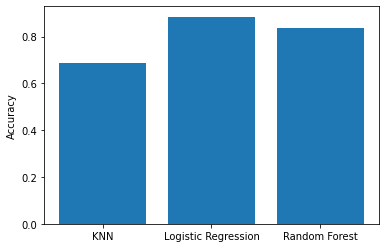

In [ ]:
plt.bar(x=model_scores.keys(), height=model_scores.values());
plt.ylabel('Accuracy'); 

## Hyper-parameter tuning with cross-validation

### GridSearchCV tuning
It will try every single hyperparameter combination to reach the best score possible.

#### Logistic Regression

In [ ]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [ ]:
# Logistic Regression
lr_grid={"C": [1,2,3,4,5,6,7,8,9], "solver": ['lbfgs','liblinear'], 'penalty':['l2']}

np.random.seed(42)
lr_gs= GridSearchCV(LogisticRegression(), param_grid= lr_grid, cv=5, verbose=True, scoring='recall')

X_train_new=train_engg(X_train.copy())
lr_gs.fit(X_train_new, y_train);

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.7s finished


400 iterations means: 20 C x 2 penalties x 2 solvers x 5 cv= 400

Let's see the best parameters and score.

In [ ]:
lr_gs.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

In [ ]:
# model score
X_test_new= test_engg(X_test.copy())
lr_gs.score(X_test_new, y_test)

0.84375

In [ ]:
# TRAINING SCORE
lr_gs.score(X_train_new, y_train)

0.9022556390977443

### KNN

In [ ]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [ ]:
# Logistic Regression
knn_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

np.random.seed(42)
knn_gs= GridSearchCV(KNeighborsClassifier(), param_grid= knn_grid, cv=5, verbose=True, scoring='recall')

X_train_new=train_engg(X_train.copy())
knn_gs.fit(X_train_new, y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished


In [ ]:
knn_gs.best_params_

{'n_neighbors': 13}

In [ ]:
# model score
X_test_new= test_engg(X_test.copy())
knn_gs.score(X_test_new, y_test)

0.875

In [ ]:
# TRAINING SCORE
knn_gs.score(X_train_new, y_train)

0.9323308270676691

### Linear SVC

In [ ]:
# Logistic Regression
svc_grid={'C':[0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9]}

np.random.seed(42)
svc_gs= GridSearchCV(LinearSVC(), param_grid= svc_grid, cv=5, verbose=True, scoring='recall')

X_train_new=train_engg(X_train.copy())
svc_gs.fit(X_train_new, y_train);

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished


In [ ]:
svc_gs.best_params_

{'C': 0.1}

In [ ]:
# model score
X_test_new= test_engg(X_test.copy())
svc_gs.score(X_test_new, y_test)

0.84375

In [ ]:
# TRAINING SCORE
svc_gs.score(X_train_new, y_train)

0.9097744360902256

#### Random Forest

In [ ]:
rf_grid = {"n_estimators": np.arange(10, 400, 50),
           "max_depth": [None, 3, 5],
           "min_samples_split": np.arange(2, 7, 2),
           "min_samples_leaf": np.arange(15, 22, 2)}

In [ ]:
np.random.seed(42)
rf_gs= GridSearchCV(RandomForestClassifier(), param_grid= rf_grid, cv=5, verbose=True)

X_train_new=train_engg(X_train.copy())
rf_gs.fit(X_train_new, y_train);

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1440 out of 1440 | elapsed:  6.5min finished


In [ ]:
rf_gs.best_params_

{'max_depth': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 6,
 'n_estimators': 10}

In [ ]:
rf_gs.score(X_test, y_test)

0.8524590163934426

In [ ]:
# TRAINING SCORE
rf_gs.score(X_train_new, y_train)

0.8305785123966942

So, none of our models are over-fitting as they have both training and test score same.

## Evaluating model
### KNN

In [ ]:
X_test_new= test_engg(X_test.copy())
y_pred= knn_gs.predict(X_test_new)

In [ ]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
pd.DataFrame({'Actual':y_test.values, 'Predicted':y_pred})

,Actual,Predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
...,...,...
56,0,0
57,1,1
58,0,0
59,0,0


### Confusion matrix

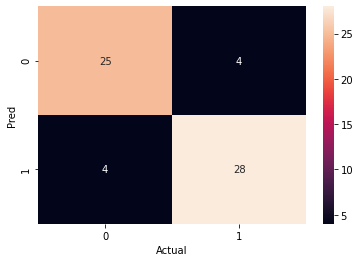

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Actual')
plt.ylabel('Pred');

Here we can see 4 people each are **False positive** (Predicted as heart patients but actually not) and **False negative** (Predicted as not heart patients but actually are).

## ROC curve and AUC score
The large the area under curve (AUC), the better the model.

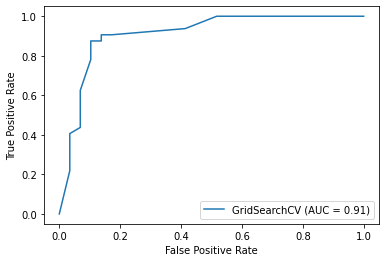

In [ ]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(knn_gs, X_test_new, y_test);

## Classification report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## Cross validation scores for different metrics

In [ ]:
knn_gs.best_params_

{'n_neighbors': 13}

In [ ]:
clf= KNeighborsClassifier(n_neighbors=13)

In [ ]:
X_new= test_engg(X.copy())
cv_acc = np.mean(cross_val_score(clf,
                         X_new,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy")) # accuracy as scoring
cv_acc

0.8017486338797815

In [ ]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X_new,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

0.9090909090909092

In [ ]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X_new,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

0.7701668806161747

In [ ]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X_new,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

0.8336682814398422

## Feature importance
Lets have a look at the model coeffients to mark the importance the models have given to different features.

As we do not get model coefficients for KNN, we will go for Logistic Regression and Linear SVC.

In [ ]:
X_train_new= train_engg(X_train.copy())

array([[-0.09463796, -1.36324398,  0.82447898, -0.22097855, -0.22551339,
         0.29049471,  0.5013658 ,  0.37351873, -0.89903709, -0.53263678,
         0.89041674, -0.78022351, -0.62486764]])

In [ ]:
def show_feat_imp(clf2):
  clf2.fit(X_train_new, y_train)
  features_dict = dict(zip(df.columns, list(clf2.coef_[0])))
  # Visualize feature importance
  features_df = pd.DataFrame(features_dict, index=[0])
  features_df.T.plot.bar(title="Feature Importance", legend=False); 

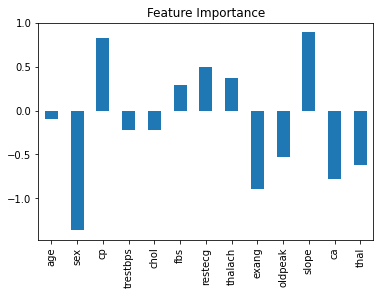

In [ ]:
# Logistic Regression
show_feat_imp(LogisticRegression(C=1, penalty='l2', solver='liblinear'))

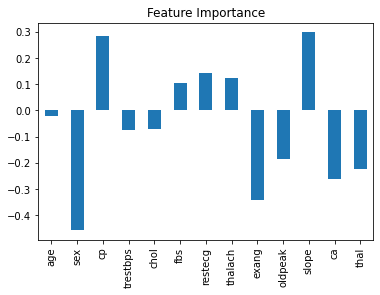

In [ ]:
# Linear SVC
show_feat_imp(LinearSVC(C=0.1))

Here we can see Features like SEX, CP, EXANG, SLOPE, CA, THAL are given more importance by both the models. And their coefficients (+ve or -ve) match their corelation on the below heatmap.

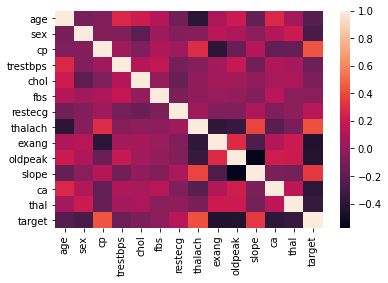

In [ ]:
sns.heatmap(df.corr())